In [4]:
import pandas as pd
import os

In [ ]:
accident_df = pd.read_excel('./data/교통사고/41110_2015.xlsx')

c:\Users\SSAFY\Desktop\04_05-pjt\.venv\Lib\site-packages\openpyxl\styles\stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


In [5]:
jijace_dict = {
    "41820": "가평군", "41280": "고양시", "41290": "과천시", "41210": "광명시",
    "41610": "광주시", "41310": "구리시", "41410": "군포시", "41570": "김포시",
    "41360": "남양주시", "41250": "동두천시", "41190": "부천시", "41130": "성남시",
    "41110": "수원시", "41390": "시흥시", "41270": "안산시", "41550": "안성시",
    "41170": "안양시", "41630": "양주시", "41830": "양평군", "41670": "여주시",
    "41800": "연천군", "41370": "오산시", "41460": "용인시", "41430": "의왕시",
    "41150": "의정부시", "41500": "이천시", "41480": "파주시", "41220": "평택시",
    "41650": "포천시", "41450": "하남시", "41590": "화성시"
}

In [56]:
# 엑셀 파일들이 저장된 폴더 경로
data_folder = './data/교통사고/' # 실제 폴더 경로로 변경하세요.
file_name = '41110_2015.xlsx'

file_path = data_folder + file_name

# --- 1. 파일명에서 지역코드(A)와 연도(B) 추출 ---
filename = os.path.basename(file_path)  # 파일 경로에서 이름만 추출
parts = filename.replace('.xlsx', '').split('_')
print(parts)
if len(parts) != 2:
    print(f"경고: 파일명 '{filename}'이 'A_B.xlsx' 형식이 아닙니다. 건너뜁니다.")

region_code_A, year_B = parts

# --- 2. 엑셀 파일 로드 (불필요한 상단 4줄 건너뛰기) ---
# 실제 데이터는 5번째 행부터 시작하므로, skiprows=4로 설정합니다.
df = pd.read_excel(file_path, skiprows=2)


['41110', '2015']


c:\Users\SSAFY\Desktop\04_05-pjt\.venv\Lib\site-packages\openpyxl\styles\stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


In [57]:
print(df)

   Unnamed: 0 Unnamed: 1 Unnamed: 2  Unnamed: 3  Unnamed: 4  여객(건)  화물(건)  \
0          경기        수원시      중앙선침범         195           0      0      1   
1          경기        수원시       신호위반         738           0      0      7   
2          경기        수원시    안전거리미확보         644           0      0      7   
3          경기        수원시       불법유턴          60           0      0      1   
4          경기        수원시         과속          14           0      0      0   
5          경기        수원시    안전운전불이행        2823           0      1     28   
6          경기        수원시  교차로운행방법위반         284           0      0      1   
7          경기        수원시  보행자보호의무위반         143           0      0      0   
8          경기        수원시       차로위반         119           0      0      0   
9          경기        수원시  직진우회전진행방해          82           0      0      0   
10         경기        수원시         기타         127           0      0      0   
11         경기        수원시       알수없음           4           0      0      0   

In [58]:
# 1. 변경할 컬럼을 '기존이름: 새이름' 형식의 딕셔너리로 만듭니다.
rename_cols = {
    'Unnamed: 0': '시도',
    'Unnamed: 1': '지자체',
    'Unnamed: 2': '법규위반',
    'Unnamed: 3': '발생건수',
    'Unnamed: 4': '대형사고',
    '여객(건)': '중대한사고(여객)',  # '여객(건)'을 '중대한사고'로 변경
    '화물(건)': '중대한사고(화물)',    # '화물(건)'을 '사망자수'로 변경
    'Unnamed: 7': '사망자수',
    'Unnamed: 8': '치사율(%)'
}

# 2. rename 함수를 사용하여 컬럼명을 변경합니다.
df.rename(columns=rename_cols, inplace=True)

# 결과 확인
print(df.columns)


Index(['시도', '지자체', '법규위반', '발생건수', '대형사고', '중대한사고(여객)', '중대한사고(화물)', '사망자수',
       '치사율(%)'],
      dtype='object')


In [59]:
print(df)

     시도  지자체       법규위반  발생건수  대형사고  중대한사고(여객)  중대한사고(화물)  사망자수  치사율(%)
0    경기  수원시      중앙선침범   195     0          0          1     3    1.54
1    경기  수원시       신호위반   738     0          0          7     7    0.95
2    경기  수원시    안전거리미확보   644     0          0          7     1    0.16
3    경기  수원시       불법유턴    60     0          0          1     0    0.00
4    경기  수원시         과속    14     0          0          0     3   21.43
5    경기  수원시    안전운전불이행  2823     0          1         28    23    0.81
6    경기  수원시  교차로운행방법위반   284     0          0          1     1    0.35
7    경기  수원시  보행자보호의무위반   143     0          0          0     0    0.00
8    경기  수원시       차로위반   119     0          0          0     1    0.84
9    경기  수원시  직진우회전진행방해    82     0          0          0     0    0.00
10   경기  수원시         기타   127     0          0          0     0    0.00
11   경기  수원시       알수없음     4     0          0          0     0    0.00
12  NaN  NaN         소계  5233     0          1         45    39 

In [60]:
# 1. 12번부터 14번 인덱스까지의 범위를 지정하여 제거합니다.
df.drop(df.index[12:15], inplace=True)

In [61]:
print(df.shape)
print(df.head())
print(df.info())

(12, 9)
   시도  지자체     법규위반  발생건수  대형사고  중대한사고(여객)  중대한사고(화물)  사망자수  치사율(%)
0  경기  수원시    중앙선침범   195     0          0          1     3    1.54
1  경기  수원시     신호위반   738     0          0          7     7    0.95
2  경기  수원시  안전거리미확보   644     0          0          7     1    0.16
3  경기  수원시     불법유턴    60     0          0          1     0    0.00
4  경기  수원시       과속    14     0          0          0     3   21.43
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   시도         12 non-null     object 
 1   지자체        12 non-null     object 
 2   법규위반       12 non-null     object 
 3   발생건수       12 non-null     int64  
 4   대형사고       12 non-null     int64  
 5   중대한사고(여객)  12 non-null     int64  
 6   중대한사고(화물)  12 non-null     int64  
 7   사망자수       12 non-null     int64  
 8   치사율(%)     12 non-null     float64
dtypes: float64(1), int64(5), object(3)
me

In [62]:
df['연도'] = int(year_B)

In [63]:
print(df.shape)
print(df.head())
print(df.info())

(12, 10)
   시도  지자체     법규위반  발생건수  대형사고  중대한사고(여객)  중대한사고(화물)  사망자수  치사율(%)    연도
0  경기  수원시    중앙선침범   195     0          0          1     3    1.54  2015
1  경기  수원시     신호위반   738     0          0          7     7    0.95  2015
2  경기  수원시  안전거리미확보   644     0          0          7     1    0.16  2015
3  경기  수원시     불법유턴    60     0          0          1     0    0.00  2015
4  경기  수원시       과속    14     0          0          0     3   21.43  2015
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   시도         12 non-null     object 
 1   지자체        12 non-null     object 
 2   법규위반       12 non-null     object 
 3   발생건수       12 non-null     int64  
 4   대형사고       12 non-null     int64  
 5   중대한사고(여객)  12 non-null     int64  
 6   중대한사고(화물)  12 non-null     int64  
 7   사망자수       12 non-null     int64  
 8   치사율(%)     12 non-null     float64
 9  

In [ ]:
def process_excel_file(file_path):
    """
    엑셀 파일 하나를 읽고, 원하는 형태로 가공하여 데이터프레임으로 반환하는 함수.
    """
    try:
        # --- 1. 파일명에서 지역코드(A)와 연도(B) 추출 ---
        filename = os.path.basename(file_path)  # 파일 경로에서 이름만 추출
        parts = filename.replace('.xlsx', '').split('_')
        print(parts)
        if len(parts) != 2:
            print(f"경고: 파일명 '{filename}'이 'A_B.xlsx' 형식이 아닙니다. 건너뜁니다.")
            return None
        
        region_code_A, year_B = parts

        # --- 2. 엑셀 파일 로드 (불필요한 상단 4줄 건너뛰기) ---
        # 실제 데이터는 5번째 행부터 시작하므로, skiprows=4로 설정합니다.
        df = pd.read_excel(file_path, skiprows=2)

        # 1. 변경할 컬럼을 '기존이름: 새이름' 형식의 딕셔너리로 만듭니다.
        rename_cols = {
            'Unnamed: 0': '시도',
            'Unnamed: 1': '지자체',
            'Unnamed: 2': '법규위반',
            'Unnamed: 3': '발생건수',
            'Unnamed: 4': '대형사고',
            '여객(건)': '중대한사고(여객)',  # '여객(건)'을 '중대한사고'로 변경
            '화물(건)': '중대한사고(화물)',    # '화물(건)'을 '사망자수'로 변경
            'Unnamed: 7': '사망자수',
            'Unnamed: 8': '치사율(%)'
        }

        # 2. rename 함수를 사용하여 컬럼명을 변경합니다.
        df.rename(columns=rename_cols, inplace=True)
        df['연도'] = int(year_B)

        # 1. 12번부터 14번 인덱스까지의 범위를 지정하여 제거합니다.
        # 1. '시도' 컬럼의 값이 '경기'가 아닌 행의 인덱스를 찾습니다.
        drop_indexes = df[df['시도'] != '경기'].index

        # 2. 찾은 인덱스를 drop 함수에 전달하여 해당 행들을 제거합니다.
        # inplace=True 옵션은 원본 데이터프레임을 직접 수정하겠다는 의미입니다.
        df.drop(drop_indexes, inplace=True)

        return df

        
    except Exception as e:
        print(f"오류: 파일 '{file_path}' 처리 중 문제가 발생했습니다: {e}")
        return None
        

In [69]:
# 엑셀 파일들이 저장된 폴더 경로
data_folder = './data/교통사고/' # 실제 폴더 경로로 변경하세요.

# 모든 처리된 데이터프레임을 담을 리스트
all_data_frames = []

# 폴더 내의 모든 엑셀 파일에 대해 반복 작업 수행
for filename in os.listdir(data_folder):
    if filename.endswith('.xlsx'):
        file_path = os.path.join(data_folder, filename)
        print(f"'{filename}' 파일 처리 중...")
        processed_df = process_excel_file(file_path)
        
        if processed_df is not None:
            all_data_frames.append(processed_df)

# 리스트에 담긴 모든 데이터프레임을 하나로 합치기
if all_data_frames:
    final_df = pd.concat(all_data_frames, ignore_index=True)
    print("\n--- 최종 통합 데이터프레임 (상위 5개) ---")
    print(final_df.head())
    
    # 최종 결과를 CSV 파일 등으로 저장할 수 있습니다.
    final_df.to_csv('final_traffic_data.csv', index=False, encoding='utf-8-sig')
else:
    print("\n처리할 엑셀 파일이 없거나 모든 파일 처리 중 오류가 발생했습니다.")


'41110_2015.xlsx' 파일 처리 중...
['41110', '2015']
'41110_2016.xlsx' 파일 처리 중...
['41110', '2016']
'41110_2017.xlsx' 파일 처리 중...
['41110', '2017']
'41110_2018.xlsx' 파일 처리 중...
['41110', '2018']
'41110_2019.xlsx' 파일 처리 중...
['41110', '2019']
'41110_2020.xlsx' 파일 처리 중...
['41110', '2020']
'41110_2021.xlsx' 파일 처리 중...
['41110', '2021']
'41110_2022.xlsx' 파일 처리 중...
['41110', '2022']
'41110_2023.xlsx' 파일 처리 중...
['41110', '2023']
'41110_2024.xlsx' 파일 처리 중...
['41110', '2024']
'41280_2015.xlsx' 파일 처리 중...
['41280', '2015']
'41280_2016.xlsx' 파일 처리 중...
['41280', '2016']
'41280_2017.xlsx' 파일 처리 중...
['41280', '2017']
'41280_2018.xlsx' 파일 처리 중...
['41280', '2018']
'41280_2019.xlsx' 파일 처리 중...
['41280', '2019']
'41280_2020.xlsx' 파일 처리 중...
['41280', '2020']
'41280_2021.xlsx' 파일 처리 중...
['41280', '2021']
'41280_2022.xlsx' 파일 처리 중...
['41280', '2022']
'41280_2023.xlsx' 파일 처리 중...
['41280', '2023']


c:\Users\SSAFY\Desktop\04_05-pjt\.venv\Lib\site-packages\openpyxl\styles\stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")
c:\Users\SSAFY\Desktop\04_05-pjt\.venv\Lib\site-packages\openpyxl\styles\stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")
c:\Users\SSAFY\Desktop\04_05-pjt\.venv\Lib\site-packages\openpyxl\styles\stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")
c:\Users\SSAFY\Desktop\04_05-pjt\.venv\Lib\site-packages\openpyxl\styles\stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")
c:\Users\SSAFY\Desktop\04_05-pjt\.venv\Lib\site-pack

'41280_2024.xlsx' 파일 처리 중...
['41280', '2024']
'41460_2015.xlsx' 파일 처리 중...
['41460', '2015']
'41460_2016.xlsx' 파일 처리 중...
['41460', '2016']
'41460_2017.xlsx' 파일 처리 중...
['41460', '2017']
'41460_2018.xlsx' 파일 처리 중...
['41460', '2018']
'41460_2019.xlsx' 파일 처리 중...
['41460', '2019']
'41460_2020.xlsx' 파일 처리 중...
['41460', '2020']
'41460_2021.xlsx' 파일 처리 중...
['41460', '2021']
'41460_2022.xlsx' 파일 처리 중...
['41460', '2022']
'41460_2023.xlsx' 파일 처리 중...
['41460', '2023']
'41460_2024.xlsx' 파일 처리 중...
['41460', '2024']
'41590_2015.xlsx' 파일 처리 중...
['41590', '2015']
'41590_2016.xlsx' 파일 처리 중...
['41590', '2016']
'41590_2017.xlsx' 파일 처리 중...
['41590', '2017']
'41590_2018.xlsx' 파일 처리 중...
['41590', '2018']
'41590_2019.xlsx' 파일 처리 중...
['41590', '2019']
'41590_2020.xlsx' 파일 처리 중...
['41590', '2020']
'41590_2021.xlsx' 파일 처리 중...
['41590', '2021']
'41590_2022.xlsx' 파일 처리 중...
['41590', '2022']
'41590_2023.xlsx' 파일 처리 중...
['41590', '2023']
'41590_2024.xlsx' 파일 처리 중...
['41590', '2024']

--- 최종 통합 데이

c:\Users\SSAFY\Desktop\04_05-pjt\.venv\Lib\site-packages\openpyxl\styles\stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")
c:\Users\SSAFY\Desktop\04_05-pjt\.venv\Lib\site-packages\openpyxl\styles\stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")
c:\Users\SSAFY\Desktop\04_05-pjt\.venv\Lib\site-packages\openpyxl\styles\stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")
c:\Users\SSAFY\Desktop\04_05-pjt\.venv\Lib\site-packages\openpyxl\styles\stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")
c:\Users\SSAFY\Desktop\04_05-pjt\.venv\Lib\site-pack

In [70]:
import pandas as pd
import os
import re
import matplotlib.pyplot as plt
import seaborn as sns


In [72]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.font_manager as fm

plt.rc('font', family='Malgun Gothic')
plt.rcParams['axes.unicode_minus'] = False

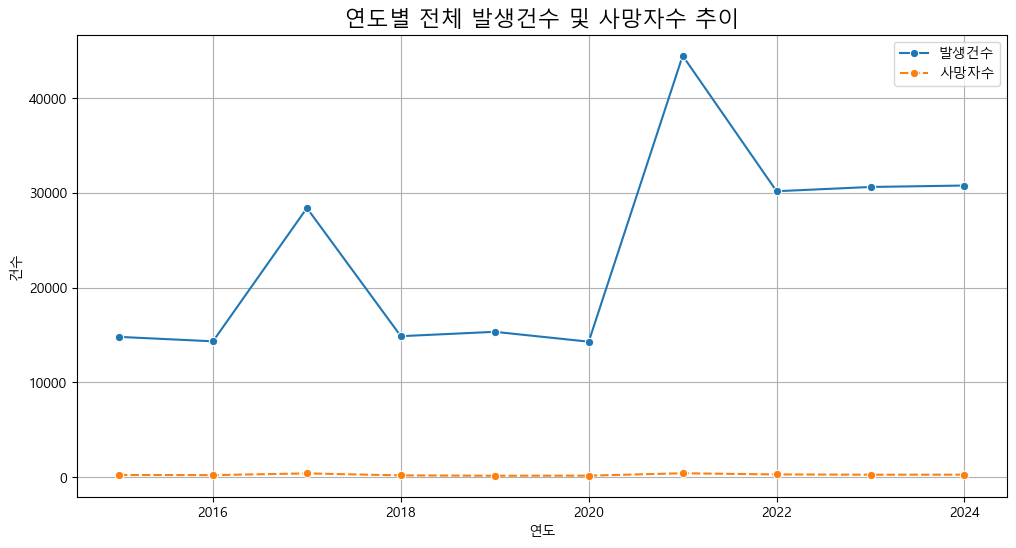

C:\Users\SSAFY\AppData\Local\Temp\ipykernel_24904\4155970240.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10_cities.values, y=top_10_cities.index, palette='viridis')


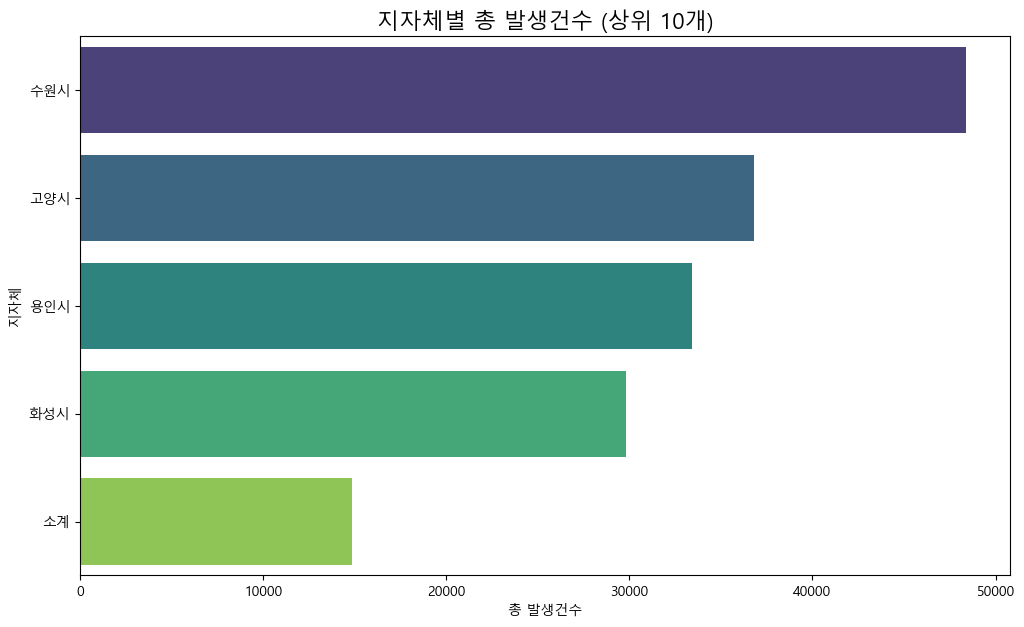

C:\Users\SSAFY\AppData\Local\Temp\ipykernel_24904\4155970240.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10_violations.values, y=top_10_violations.index, palette='rocket')


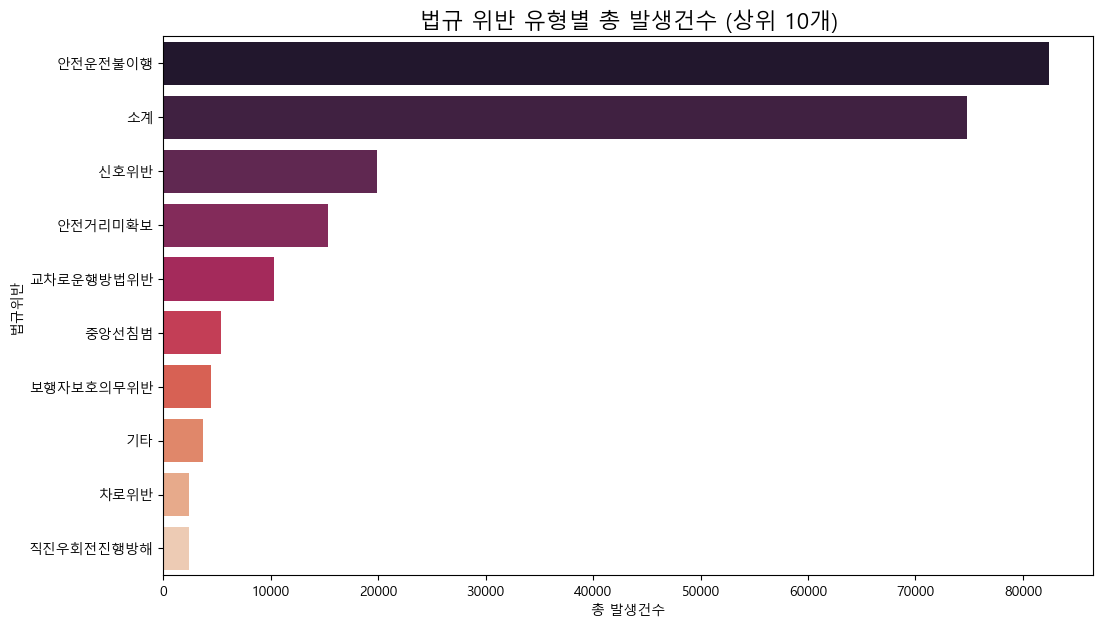

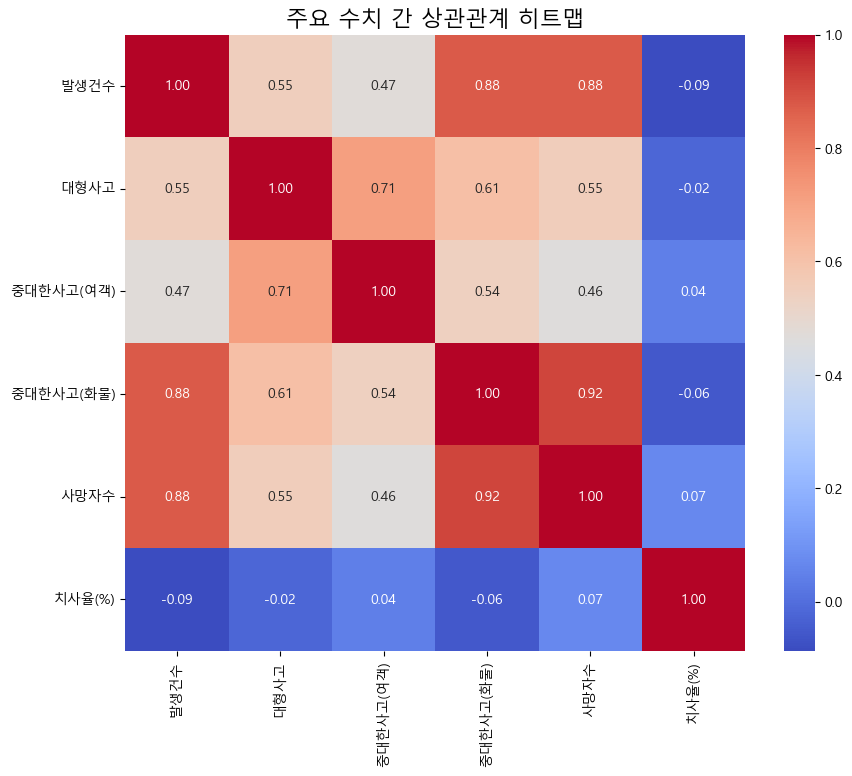

In [73]:

if not final_df.empty:
    # --- 1. 연도별 전체 사고 발생건수 및 사망자수 추이 ---
    yearly_trends = final_df.groupby('연도')[['발생건수', '사망자수']].sum()

    plt.figure(figsize=(12, 6))
    sns.lineplot(data=yearly_trends, marker='o')
    plt.title('연도별 전체 발생건수 및 사망자수 추이', fontsize=16)
    plt.ylabel('건수')
    plt.grid(True)
    plt.show()

    # --- 2. 지자체별 총 발생건수 (상위 10개) ---
    top_10_cities = final_df.groupby('지자체')['발생건수'].sum().sort_values(ascending=False).head(10)

    plt.figure(figsize=(12, 7))
    sns.barplot(x=top_10_cities.values, y=top_10_cities.index, palette='viridis')
    plt.title('지자체별 총 발생건수 (상위 10개)', fontsize=16)
    plt.xlabel('총 발생건수')
    plt.show()

    # --- 3. 법규 위반 유형별 총 발생건수 (상위 10개) ---
    top_10_violations = final_df.groupby('법규위반')['발생건수'].sum().sort_values(ascending=False).head(10)

    plt.figure(figsize=(12, 7))
    sns.barplot(x=top_10_violations.values, y=top_10_violations.index, palette='rocket')
    plt.title('법규 위반 유형별 총 발생건수 (상위 10개)', fontsize=16)
    plt.xlabel('총 발생건수')
    plt.show()

    # --- 4. 주요 수치 간의 상관관계 (히트맵) ---
    corr_df = final_df[['발생건수', '대형사고', '중대한사고(여객)', '중대한사고(화물)', '사망자수', '치사율(%)']]
    
    plt.figure(figsize=(10, 8))
    sns.heatmap(corr_df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
    plt.title('주요 수치 간 상관관계 히트맵', fontsize=16)
    plt.show()